# IGC Sklearn tutorial
### Dmitry Petrov

#### May 30


### Main goal of this tutorial is to share my experience of using particular python libraries for machine learning/data analysis and provide brief intro into them

# Part 1. Overview

<a id='sklearn1'></a>

## 1. Sklearn: main features


#### Swiss army knife for machine learning, second best library for machine learning (except neural nets)


+ great architecture, interface and documentation
+ wide variety of tools for predictive modelling, dimensionality reduction, validation and preprocessing
+ compatible with pandas 
+ supports sparse matrices for the most of methods
+ reproducible
+ parallelization in terms of multi-threading
+ implementations of some models are slow or memory inefficient
+ there is no parallelization for grid computing (not that I know of)

<a id='sklearn2'></a>

## 2. Main modules

+ **cluster.** Clustering methods (k-means, spectral clustering, DBSCAN)
+ **model_selection.** Validation tools
+ **decomposition.** Matrix decomposotion tools like SVD or PCA
+ **ensemble.** Ensemble methods like Random Forest, bagging classifiers or Adaboost
+ **feature_selection.** Feature selection tools like univariate test or recursive feature elimination
+ **linear_model.** Linear models and tools
+ **manifold.** Non-linear dimensionality reduction methods
+ **metrics.** Metrics for validationg and analysing models
+ **neighbors.** Nearest neighbors models and tools
+ **pipeline.** Tool for chaining data analysis steps
+ **svm.** Support Vector Machines methods
+ **preprocessing.** Data preprocessing tools




## 3. Base objects of sklearn

Main reason of sklearn's success (IMO) -- it provides simple, logical and unified architecture for doing ML.

+ **Estimators.** Predictive (classifiers and regressors) and clustering models.

+ **Transformers.** Data processing tools (scaling, PCA, etc.)

+ **Pipelines**. Tools that allow you to combine transformers and estimators

## 4. Estimators: basic usage and methods

+ **Examples:** linear/logistic regression, k-means clustering, random forest, etc

+ **.__init__** initialize estimator

+ **.fit(data, target)** fit model to data

+ **.predict/predict_proba/predict_log_proba(data)** make predictions using fitted model

+ **.set_params(params)**. set hyper-parameters of the estimator

## 5. Transformers: basic usage and methods

+ **Examples:** standard scaling, label encoding, one-hot encoding

+ **.__init__** initialize transformer

+ **.fit(data, target=None)** fit model to data

+ **.transform(data)** transform data using fitted models

+ **.fit_transform(data)** fit and transform data (useful for pipilenes)


<a id='pandas'></a>

## 2. Basic usage





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits, load_boston
import warnings
%matplotlib inline

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

### Example 1: houses data

We will use data from here https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
Full data description: https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt

It is data set describing the sale of individual residential property in Ames, Iowa
from 2006 to 2010.

### Getting sense of the data

In [25]:
data = pd.read_csv('data/houses_train.csv', index_col = 0)
data.shape

(1460, 80)

In [26]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


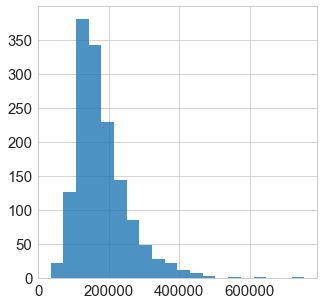

In [27]:
plt.figure(figsize=(5,5))
plt.hist(data.SalePrice, bins=20, alpha=0.8)
pass

Text(0,0.5,'Sale Price, $')

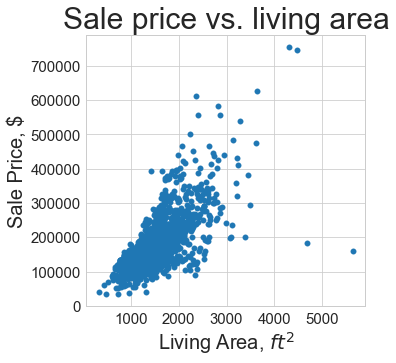

In [28]:
plt.figure(figsize=(5,5))
plt.title('Sale price vs. living area', fontsize=30)
plt.scatter(data.GrLivArea, data.SalePrice)
plt.xlabel('Living Area, $ft^2$', fontsize=20)
plt.ylabel('Sale Price, $', fontsize=20)

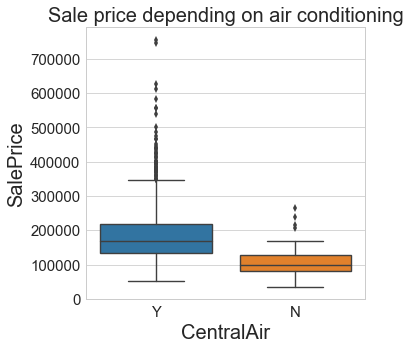

In [29]:
plt.figure(figsize=(5,5))
plt.title('Sale price depending on air conditioning')
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20,
                            'xtick.labelsize': 15, 'ytick.labelsize': 15})   
sns.boxplot('CentralAir', 'SalePrice', data=data)


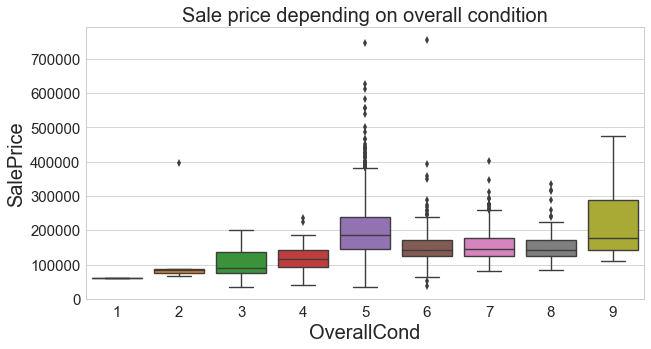

In [30]:
plt.figure(figsize=(10,5))
plt.title('Sale price depending on overall condition')
sns.boxplot('OverallCond', 'SalePrice', data=data)


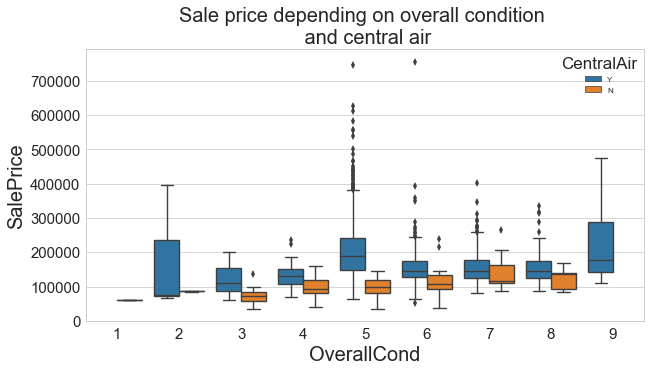

In [31]:
plt.figure(figsize=(10,5))
plt.title('Sale price depending on overall condition \n and central air')
sns.boxplot('OverallCond', 'SalePrice', data=data, hue='CentralAir')

## Our first model on numerical features

### Selecting numerical features

In [32]:
cat_cols = [col for col in data.columns if data[col].dtype == object and col != 'SalePrice']
num_cols = [col for col in data.columns if data[col].dtype != object and col != 'SalePrice']
data[num_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [33]:
data[cat_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Filling nans with zeros

In [34]:
data[num_cols].isnull().mean().head()

MSSubClass     0.000000
LotFrontage    0.177397
LotArea        0.000000
OverallQual    0.000000
OverallCond    0.000000
dtype: float64

In [35]:
data[num_cols] = data[num_cols].fillna(0)

In [36]:
data[num_cols].isnull().mean().head()

MSSubClass     0.0
LotFrontage    0.0
LotArea        0.0
OverallQual    0.0
OverallCond    0.0
dtype: float64

### Adding categorical variables: label encoding


In [42]:
le = LabelEncoder()
encoded_labels = le.fit_transform(data.HeatingQC)


In [46]:
from sklearn.preprocessing import LabelEncoder

data[cat_cols] = data[cat_cols].fillna('NAN')
le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data[cat_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
4,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
5,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4


### Let's try linear regression on numerical features

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

pd.options.mode.chained_assignment = None  # default='warn'


### Train/test split

In [60]:
target = data.SalePrice
train, test, y_train, y_test = train_test_split(data, target, 
                                                test_size=0.33, 
                                                random_state=42)

In [61]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
616,85,3,80.0,8800,1,1,3,3,0,4,...,0,3,2,1,0,5,2010,8,0,137500
614,20,3,70.0,8402,1,1,3,3,0,4,...,0,3,4,1,0,12,2007,6,5,147000
1304,20,3,73.0,8688,1,1,3,3,0,4,...,0,3,4,1,0,4,2006,8,4,232000
487,20,3,79.0,10289,1,1,3,3,0,4,...,0,3,4,1,0,6,2007,8,4,156000
562,20,3,77.0,10010,1,1,3,3,0,4,...,0,3,4,1,0,4,2006,8,4,170000


### Cross-validation

In [69]:
kf = KFold(n_splits=3, shuffle=True, random_state=0)
a = kf.split(data, target)

In [78]:
#regr = RandomForestRegressor(max_depth=25, n_estimators=100, random_state=0)
regr = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf = list(kf.split(train, y_train))

scores = cross_val_score(regr, train[num_cols], y_train, 
                         cv=kf, scoring='mean_squared_error')
scores = -1*scores
scores = np.sqrt(scores)

print('TRAIN CV score {:.2f} ± {:.2f}'.format(scores.mean(), scores.std()))

TRAIN CV score 39177.84 ± 7802.32


In [81]:
regr.fit(train[num_cols], y_train) 
preds = regr.predict(test[num_cols])
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)

print('TEST RMSE', rmse)
print('TEST MAE', mae)

TEST RMSE 39198.61974291592
TEST MAE 23761.339104589624


Text(0,0.5,'true prices')

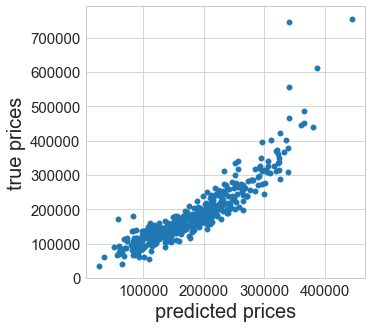

In [85]:
plt.figure(figsize=(5,5))
plt.scatter(preds, y_test)
plt.xlabel('predicted prices')
plt.ylabel('true prices')


### Getting coefficients

In [89]:
regr.coef_.shape

(36,)

In [90]:
data[num_cols].shape

(1460, 36)

In [19]:
area_ind = num_cols.index('GrLivArea')
area_coef = regr.coef_[area_ind]
intercept = regr.intercept_

print(area_coef, intercept)

31.140792245828948 -703873.763617021


#### **Note**: sklearn doesn't have statistical tools (if you want coef p-values for example). For this you should use statsmodels or write code yourself

### Let's try Random Forest

In [91]:
regr_rf = RandomForestRegressor(random_state=0)

scores = cross_val_score(regr_rf, train[num_cols], y_train, cv=kf, scoring='neg_mean_squared_error')
scores = -1*scores
scores = np.sqrt(scores)

print('CV score {:.2f} ± {:.2f}'.format(scores.mean(), scores.std()))

regr_rf.fit(train[num_cols], y_train) 
preds_rf = regr_rf.predict(test[num_cols])
rmse = np.sqrt(mean_squared_error(y_test, preds_rf))
mae = mean_absolute_error(y_test, preds_rf)

print('TEST RMSE RF', rmse)
print('TEST MAE RF', mae)

CV score 32893.08 ± 2685.84
TEST RMSE RF 34861.90234126962
TEST MAE RF 19213.01970954357


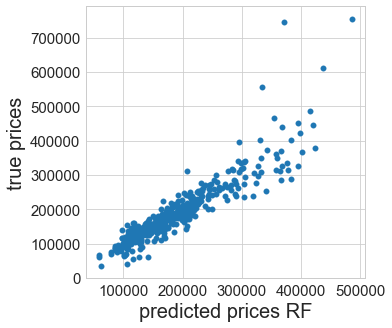

In [92]:
plt.figure(figsize=(5,5))
plt.scatter(preds_rf, y_test)
plt.xlabel('predicted prices RF')
plt.ylabel('true prices')
pass

### Now let's try random forest on all features

In [93]:
scores = cross_val_score(regr_rf, train[num_cols + cat_cols], y_train, cv=kf, scoring='neg_mean_squared_error')
scores = -1*scores
scores = np.sqrt(scores)

print('CV score {:.2f} ± {:.2f}'.format(scores.mean(), scores.std()))

regr_rf.fit(train[num_cols + cat_cols], y_train) 
preds_rf = regr_rf.predict(test[num_cols + cat_cols])
rmse = np.sqrt(mean_squared_error(y_test, preds_rf))
mae = mean_absolute_error(y_test, preds_rf)
print('TEST RMSE RF', rmse)
print('TEST MAE RF', mae)

CV score 31699.48 ± 2209.89
TEST RMSE RF 33612.89019154063
TEST MAE RF 18875.977385892114


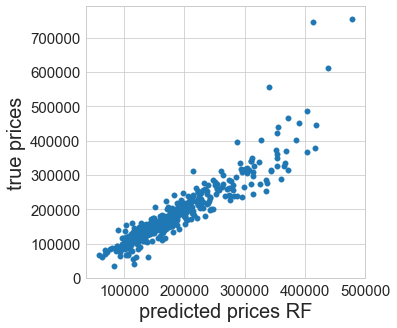

In [94]:
plt.figure(figsize=(5,5))
plt.scatter(preds_rf, y_test)
plt.xlabel('predicted prices RF')
plt.ylabel('true prices')
pass

### Okay, how about grid search

In [98]:
from sklearn.grid_search import GridSearchCV

rf_params = {'n_estimators' : [10, 50, 100],
             'max_depth' : [5, 10, 15, None],
             'max_features' : [0.05, 0.1, 0.2, 'auto'],
             'n_jobs': [-1]}

rf_grid = GridSearchCV(regr_rf, rf_params, cv=kf, 
                       scoring='neg_mean_squared_error',
                      verbose=4)

In [99]:
feats = num_cols + cat_cols
rf_grid.fit(train[feats], y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=5, max_features=0.05, n_estimators=10, n_jobs=-1 ......
[CV]  max_depth=5, max_features=0.05, n_estimators=10, n_jobs=-1, score=-1301160775.332987 -   0.2s
[CV] max_depth=5, max_features=0.05, n_estimators=10, n_jobs=-1 ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=0.05, n_estimators=10, n_jobs=-1, score=-1630870698.184404 -   0.2s
[CV] max_depth=5, max_features=0.05, n_estimators=10, n_jobs=-1 ......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=5, max_features=0.05, n_estimators=10, n_jobs=-1, score=-1185426025.924436 -   0.2s
[CV] max_depth=5, max_features=0.05, n_estimators=10, n_jobs=-1 ......


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=5, max_features=0.05, n_estimators=10, n_jobs=-1, score=-1928224370.822917 -   0.2s
[CV] max_depth=5, max_features=0.05, n_estimators=10, n_jobs=-1 ......
[CV]  max_depth=5, max_features=0.05, n_estimators=10, n_jobs=-1, score=-1749801321.615638 -   0.2s
[CV] max_depth=5, max_features=0.05, n_estimators=50, n_jobs=-1 ......
[CV]  max_depth=5, max_features=0.05, n_estimators=50, n_jobs=-1, score=-1195914971.676747 -   0.2s
[CV] max_depth=5, max_features=0.05, n_estimators=50, n_jobs=-1 ......
[CV]  max_depth=5, max_features=0.05, n_estimators=50, n_jobs=-1, score=-1658167588.540261 -   0.2s
[CV] max_depth=5, max_features=0.05, n_estimators=50, n_jobs=-1 ......
[CV]  max_depth=5, max_features=0.05, n_estimators=50, n_jobs=-1, score=-1215379652.081539 -   0.2s
[CV] max_depth=5, max_features=0.05, n_estimators=50, n_jobs=-1 ......
[CV]  max_depth=5, max_features=0.05, n_estimators=50, n_jobs=-1, score=-1962026734.371335 -   0.2s
[CV] max_depth=5, max_features=0.05, n_estima

[CV]  max_depth=5, max_features=auto, n_estimators=50, n_jobs=-1, score=-863604058.012485 -   0.2s
[CV] max_depth=5, max_features=auto, n_estimators=50, n_jobs=-1 ......
[CV]  max_depth=5, max_features=auto, n_estimators=50, n_jobs=-1, score=-1285689716.933412 -   0.2s
[CV] max_depth=5, max_features=auto, n_estimators=50, n_jobs=-1 ......
[CV]  max_depth=5, max_features=auto, n_estimators=50, n_jobs=-1, score=-1214540562.411051 -   0.2s
[CV] max_depth=5, max_features=auto, n_estimators=100, n_jobs=-1 .....
[CV]  max_depth=5, max_features=auto, n_estimators=100, n_jobs=-1, score=-1090430223.954483 -   0.3s
[CV] max_depth=5, max_features=auto, n_estimators=100, n_jobs=-1 .....
[CV]  max_depth=5, max_features=auto, n_estimators=100, n_jobs=-1, score=-1018836389.532876 -   0.3s
[CV] max_depth=5, max_features=auto, n_estimators=100, n_jobs=-1 .....
[CV]  max_depth=5, max_features=auto, n_estimators=100, n_jobs=-1, score=-857684659.691379 -   0.3s
[CV] max_depth=5, max_features=auto, n_estim

[CV]  max_depth=10, max_features=0.2, n_estimators=100, n_jobs=-1, score=-877190126.948539 -   0.3s
[CV] max_depth=10, max_features=0.2, n_estimators=100, n_jobs=-1 .....
[CV]  max_depth=10, max_features=0.2, n_estimators=100, n_jobs=-1, score=-873335249.532679 -   0.3s
[CV] max_depth=10, max_features=0.2, n_estimators=100, n_jobs=-1 .....
[CV]  max_depth=10, max_features=0.2, n_estimators=100, n_jobs=-1, score=-717599241.641485 -   0.3s
[CV] max_depth=10, max_features=0.2, n_estimators=100, n_jobs=-1 .....
[CV]  max_depth=10, max_features=0.2, n_estimators=100, n_jobs=-1, score=-1142558613.361517 -   0.3s
[CV] max_depth=10, max_features=0.2, n_estimators=100, n_jobs=-1 .....
[CV]  max_depth=10, max_features=0.2, n_estimators=100, n_jobs=-1, score=-964621961.051297 -   0.3s
[CV] max_depth=10, max_features=auto, n_estimators=10, n_jobs=-1 .....
[CV]  max_depth=10, max_features=auto, n_estimators=10, n_jobs=-1, score=-976195461.013404 -   0.2s
[CV] max_depth=10, max_features=auto, n_esti

[CV]  max_depth=15, max_features=0.1, n_estimators=100, n_jobs=-1, score=-1217225747.192477 -   0.3s
[CV] max_depth=15, max_features=0.1, n_estimators=100, n_jobs=-1 .....
[CV]  max_depth=15, max_features=0.1, n_estimators=100, n_jobs=-1, score=-1081991101.475203 -   0.3s
[CV] max_depth=15, max_features=0.2, n_estimators=10, n_jobs=-1 ......
[CV]  max_depth=15, max_features=0.2, n_estimators=10, n_jobs=-1, score=-889533393.318429 -   0.2s
[CV] max_depth=15, max_features=0.2, n_estimators=10, n_jobs=-1 ......
[CV]  max_depth=15, max_features=0.2, n_estimators=10, n_jobs=-1, score=-942388237.277772 -   0.2s
[CV] max_depth=15, max_features=0.2, n_estimators=10, n_jobs=-1 ......
[CV]  max_depth=15, max_features=0.2, n_estimators=10, n_jobs=-1, score=-756589435.164868 -   0.2s
[CV] max_depth=15, max_features=0.2, n_estimators=10, n_jobs=-1 ......
[CV]  max_depth=15, max_features=0.2, n_estimators=10, n_jobs=-1, score=-1358838653.003692 -   0.2s
[CV] max_depth=15, max_features=0.2, n_estimat

[CV]  max_depth=None, max_features=0.1, n_estimators=10, n_jobs=-1, score=-1065463536.906684 -   0.2s
[CV] max_depth=None, max_features=0.1, n_estimators=10, n_jobs=-1 ....
[CV]  max_depth=None, max_features=0.1, n_estimators=10, n_jobs=-1, score=-887455941.630102 -   0.2s
[CV] max_depth=None, max_features=0.1, n_estimators=10, n_jobs=-1 ....
[CV]  max_depth=None, max_features=0.1, n_estimators=10, n_jobs=-1, score=-1276284261.298667 -   0.2s
[CV] max_depth=None, max_features=0.1, n_estimators=10, n_jobs=-1 ....
[CV]  max_depth=None, max_features=0.1, n_estimators=10, n_jobs=-1, score=-1315145728.519795 -   0.2s
[CV] max_depth=None, max_features=0.1, n_estimators=50, n_jobs=-1 ....
[CV]  max_depth=None, max_features=0.1, n_estimators=50, n_jobs=-1, score=-949852349.241831 -   0.2s
[CV] max_depth=None, max_features=0.1, n_estimators=50, n_jobs=-1 ....
[CV]  max_depth=None, max_features=0.1, n_estimators=50, n_jobs=-1, score=-963704006.230720 -   0.2s
[CV] max_depth=None, max_features=0.

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   59.1s finished


GridSearchCV(cv=[(array([  0,   1, ..., 976, 977]), array([  5,   8, ..., 970, 974])), (array([  0,   3, ..., 975, 977]), array([  1,   2, ..., 971, 976])), (array([  1,   2, ..., 974, 976]), array([  0,   3, ..., 975, 977])), (array([  0,   1, ..., 976, 977]), array([  4,  13, ..., 972, 973])), (array([  0,   1, ..., 976, 977]), array([  9,  11, ..., 958, 961]))],
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15, None], 'max_features': [0.05, 0.1, 0.2, 'auto'], 'n_jobs': [-1]},
       pre_dispatch='2*

In [100]:
best_params = rf_grid.best_params_
regr_rf.set_params(**best_params)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=0.2, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [101]:
scores = cross_val_score(regr_rf, train[num_cols + cat_cols], y_train, cv=kf, scoring='neg_mean_squared_error')
scores = -1*scores
scores = np.sqrt(scores)

print('CV score {:.2f} ± {:.2f}'.format(scores.mean(), scores.std()))

regr_rf.fit(train[num_cols + cat_cols], y_train) 
preds_rf = regr_rf.predict(test[num_cols + cat_cols])
rmse = np.sqrt(mean_squared_error(y_test, preds_rf))
mae = mean_absolute_error(y_test, preds_rf)
print('TEST RMSE RF', rmse)
print('TEST MAE RF', mae)

CV score 30105.15 ± 1947.17
TEST RMSE RF 30292.93836669103
TEST MAE RF 17109.176662663478


### Example 2: MNIST Classification

In [105]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='data')

In [106]:
mnist_data = mnist.data
mnist_target = mnist.target

Target variable for index -100 is 9.0


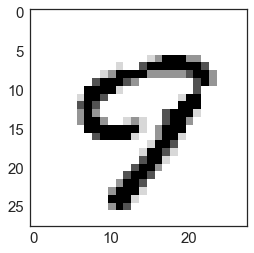

In [111]:
sns.set_style('white')
ind = -100
print('Target variable for index {} is {}'.format(ind, mnist_target[ind]))
plt.imshow(mnist_data[ind,:].reshape((28,28)), cmap='Greys')

In [112]:
mnist_df = pd.DataFrame(mnist_data)

In [113]:
mnist_df['target'] = mnist_target.astype(int)

In [114]:
mnist_df.target.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: target, dtype: int64

In [115]:
sel2 = mnist_df[mnist_df.target == 2]
sel2.target.value_counts()

2    6990
Name: target, dtype: int64

In [35]:
sel2 = mnist_df.query('target == 2')
sel2.target.value_counts()

2    6990
Name: target, dtype: int64

## 3. Classification on MNIST data

In [131]:
features = mnist_df.columns[:-1]

In [132]:
mnist_df.iloc[0].max()

255

In [133]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np



#### Splitting data into train/test

In [124]:
X_train, X_test, y_train, y_test = train_test_split(mnist_df[features], 
                                                    mnist_df.target, test_size = 0.5, 
                                                    random_state = 0, stratify = mnist_df.target)

In [141]:
clf_lr = SGDClassifier(loss='log', penalty = 'elasticnet',
                       random_state=1, n_iter=5)
clf_lr.fit(X_train, y_train)
preds = clf_lr.predict(X_test)
print('Accuracy on test:', accuracy_score(y_test, preds))

Accuracy on test: 0.8825428571428572


In [142]:
clf_lr.coef_.shape

(10, 784)

In [144]:
probs = clf_lr.predict_proba(X_test)

In [147]:
probs[:, 9]

array([0., 0., 0., ..., 0., 0., 0.])

In [136]:
scaler = StandardScaler()
pipe = Pipeline([('scaler', scaler), ('clf', clf_lr)])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
print('Accuracy on test:', accuracy_score(y_test, preds))

Accuracy on test: 0.9130285714285714


In [139]:
pipe.decision_function(X_test)

(35000, 10)

In [47]:
pipe.named_steps['scaler']

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scaler.mean_[15]

0.00025714285714285715

In [50]:
X_train.mean()[15]

0.00025714285714285715

In [51]:
pipe.named_steps['scaler'].scale_[15]

0.04810633629617291

In [52]:
X_train.std(ddof=0)[15]

0.04810633629617291

In [53]:
pipe.named_steps['clf']

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=1,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [54]:
pipe.named_steps['clf'].coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clf_rf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs = 8, max_depth=30)


In [56]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(clf_lr, mnist_df[features], y=mnist_df.target, 
                         scoring = 'accuracy', verbose = 0, n_jobs = 8)
print('CV score is {:.3f} ± {:.3f}'.format(scores.mean(), scores.std()))

CV score is 0.859 ± 0.005


In [57]:
scores = cross_val_score(pipe, mnist_df[features], y=mnist_df.target, 
                         scoring = 'accuracy', verbose = 0, n_jobs = 8)
print('CV score is {:.3f} ± {:.3f}'.format(scores.mean(), scores.std()))

CV score is 0.910 ± 0.003


In [58]:
scores = cross_val_score(clf_rf, mnist_df[features], y=mnist_df.target, 
                         scoring = 'accuracy', verbose = 0, n_jobs = 8)
print('CV score is {:.3f} ± {:.3f}'.format(scores.mean(), scores.std()))

CV score is 0.943 ± 0.003


In [59]:
clf_rf.fit(X_train, y_train)
preds = clf_rf.predict(X_test)
print('Accuracy on test:', accuracy_score(y_test, preds))

Accuracy on test: 0.9380857142857143


In [60]:
from sklearn.grid_search import GridSearchCV

rf_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5]}

grid_cv = KFold(n_splits=2, shuffle=True, random_state=0)
clf_grid = GridSearchCV(clf_rf, param_grid= rf_grid, cv = list(grid_cv.split(X_train)))
clf_grid.fit(X_train, y_train)
pass

In [61]:
clf_grid.best_params_

{'max_depth': None, 'n_estimators': 100}

In [62]:
preds = clf_grid.predict(X_test)
print('Accuracy on test:', accuracy_score(y_test, preds))

Accuracy on test: 0.9650285714285715


In [63]:
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [ ]:
pipe_grid = {'scaler__with_mean': [True, False],
           'clf__alpha': [0.001, 0.01],
           'clf__l1_ratio': [0, 0.5, 1]}

grid_cv = KFold(n_splits=2, shuffle=True, random_state=0)
clf_grid = GridSearchCV(pipe, param_grid= pipe_grid, cv = list(grid_cv.split(X_train)))
clf_grid.fit(X_train, y_train)
pass

In [ ]:
pipe

In [ ]:
clf_grid.best_score_

In [ ]:
clf_grid.best_params_

In [ ]:
preds = clf_grid.predict(X_test)
print('Accuracy on test:', accuracy_score(y_test, preds))